<a href="https://colab.research.google.com/github/roger-telecom/Machine-Learning-and-Data-Science/blob/main/Previs%C3%A3o_de_lucros_com_venda_de_sorvetes_utilizando_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREVISÃO DE LUCRO COM VENDA DE SORVETES UTILIZANDO TENSOR FLOW

Neste momento a ideia é fazer um modelo que consegue prever os lucros baseado na temperatura do ambiente.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.8.2'

In [3]:
#A temperatura externa é a variável de entrada e a de saída é os lucros que serão obtidos

base = pd.read_csv('/content/SalesData.csv')
base.reset_index(drop = True, inplace = True)

In [4]:
base.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


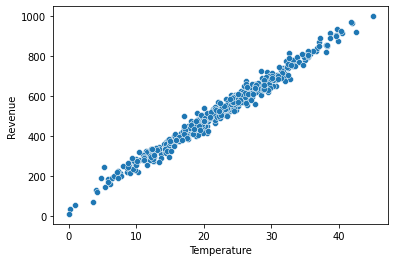

In [5]:
sns.scatterplot(x=base['Temperature'], y=base['Revenue'])

Base de treinamento

In [7]:
#Configuração

x_train = base['Temperature']
y_train = base['Revenue']

In [9]:
#Ambas possuem dimensão 500

x_train.shape
y_train.shape

(500,)

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [27]:
epochs_hist = model.fit(x_train, y_train, epochs = 500)

Epoch 1/500
16/16 [==============================] - 0s 2ms/step - loss: 170574.8750
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 16557.9004
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 5524.8843
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 1536.4980
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 828.1578
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 701.6907
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 694.0411
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 688.2655
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 676.5601
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 676.4619
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 670.8706
Epoch 12/500
16/16 [==============================] - 0s 2ms/step - loss: 676.7656
Epoch 

In [28]:
epochs_hist.history.keys()

dict_keys(['loss'])

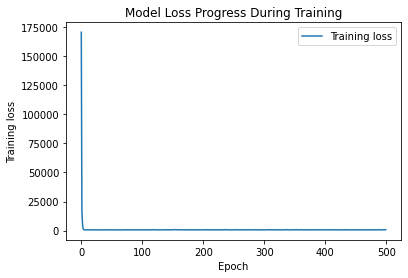

In [29]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [30]:
model.get_weights()

[array([[ 4.7256792e-01, -1.3724408e+00, -7.8422196e-02, -4.3751940e-02,
         -2.2022965e+00, -2.4122170e-03, -1.8151990e+00,  3.3546591e+00,
          4.6265788e-02, -7.8895502e-02]], dtype=float32),
 array([-0.12001969, -3.4897974 ,  2.0056405 ,  1.0103968 , -4.241151  ,
         0.05310501, -3.8979218 ,  5.003215  , -1.0744988 ,  1.9760888 ],
       dtype=float32),
 array([[ 3.8547945e-01],
        [-1.4582492e+00],
        [ 9.6173976e-03],
        [-4.8574442e-03],
        [-2.3892896e+00],
        [-1.2721426e-03],
        [-1.9156166e+00],
        [ 3.2272203e+00],
        [ 5.0172722e-03],
        [ 9.5256669e-03]], dtype=float32),
 array([6.6713805], dtype=float32)]

In [31]:
epochs_hist = model.fit(x_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 666.1572
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 664.6525
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 723.8961
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 672.2649
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 646.2305
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 643.7750
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 671.0546
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 650.0288
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 666.6905
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 737.0045
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 639.9553
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 658.7205
E

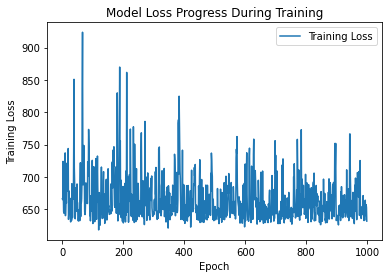

In [32]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [33]:
model.get_weights()

[array([[ 1.5466460e-02,  6.6015398e-04, -2.0755802e-03, -2.8400466e-02,
          4.5396071e-02, -1.9277200e-03, -2.1101214e-02,  4.5981946e+00,
          3.3566903e-02,  2.1905297e-02]], dtype=float32),
 array([-0.3509892 , -0.01604798,  0.04848344,  0.71440226, -1.155402  ,
         0.04359353,  0.51551676,  6.588838  , -0.8525198 , -0.5668398 ],
       dtype=float32),
 array([[ 7.48061400e-04],
        [ 4.25545113e-05],
        [-1.11037691e-04],
        [-5.31500299e-03],
        [ 8.77488963e-03],
        [-1.02560814e-04],
        [-3.20297433e-03],
        [ 4.61843252e+00],
        [ 6.72530010e-03],
        [ 4.19685943e-03]], dtype=float32),
 array([14.372903], dtype=float32)]

PREVISÕES

In [34]:
temp = 5
revenue = model.predict([temp])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[150.96602]]


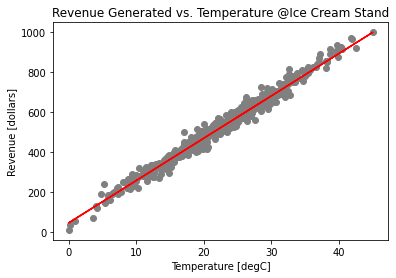

In [36]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

CONFIRMAÇÃO DOS RESULTADOS COM SKLEARN

In [54]:
x_train.shape
x_train

array([[24.56688442],
       [26.00519115],
       [27.79055388],
       [20.59533505],
       [11.50349764],
       [14.35251388],
       [13.70777988],
       [30.83398474],
       [ 0.97686999],
       [31.66946458],
       [11.45525338],
       [ 3.66466958],
       [18.81182403],
       [13.62450892],
       [39.53990899],
       [18.48314099],
       [25.93537514],
       [42.51528041],
       [29.58948056],
       [21.77594799],
       [25.45783637],
       [15.21456942],
       [22.61931574],
       [16.25872074],
       [23.88172478],
       [18.97830025],
       [15.6614643 ],
       [29.18504465],
       [19.02461092],
       [35.12015142],
       [24.18393726],
       [15.23119012],
       [ 8.79095281],
       [18.23322784],
       [35.62892497],
       [37.05754246],
       [22.28455032],
       [17.51707397],
       [31.7379196 ],
       [17.04973761],
       [23.0034888 ],
       [ 8.75555394],
       [18.77535808],
       [14.10966102],
       [18.63391286],
       [15

In [57]:
y_train.shape
y_train

array([[ 534.7990284 ],
       [ 625.1901215 ],
       [ 660.6322888 ],
       [ 487.7069603 ],
       [ 316.2401944 ],
       [ 367.9407438 ],
       [ 308.8945179 ],
       [ 696.7166402 ],
       [  55.39033824],
       [ 737.8008241 ],
       [ 325.9684084 ],
       [  71.16015301],
       [ 467.4467066 ],
       [ 289.5409341 ],
       [ 905.4776043 ],
       [ 469.9090332 ],
       [ 648.2099977 ],
       [ 921.508275  ],
       [ 649.5611747 ],
       [ 534.6228653 ],
       [ 612.1539491 ],
       [ 353.3256334 ],
       [ 524.2361154 ],
       [ 374.231135  ],
       [ 523.1245467 ],
       [ 473.6043349 ],
       [ 402.4553204 ],
       [ 679.3177906 ],
       [ 517.5340283 ],
       [ 809.6720534 ],
       [ 528.3804165 ],
       [ 356.0980075 ],
       [ 237.7639106 ],
       [ 418.1372788 ],
       [ 809.4634112 ],
       [ 870.7659159 ],
       [ 550.2785159 ],
       [ 405.6614459 ],
       [ 740.9356848 ],
       [ 501.7329901 ],
       [ 539.6880057 ],
       [ 242.236

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [60]:
#Faz a classificação de 21.44até 44.83

regressor.coef_

array([[21.44362551]])

In [61]:
regressor.intercept_

array([44.83126709])

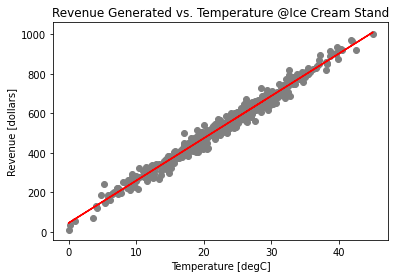

In [63]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [64]:
temp = 5
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[152.04939464]]
